# Explore New Incident File

Contents

1. [A](#1) <br>
    1.1. [AA](#1.1) <br>
    1.2. [AAA](#1.2) <br>
    1.3. [AAAA](#1.3) <br>
2. [B](#2) <br>
    2.1. [BB](#2.1) <br>

In [49]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import timeit
import numpy as np
import pandas as pd
import seaborn as sns
from math import sqrt
from datetime import date
import holidays
sns.set()
import warnings
warnings.filterwarnings("ignore")

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.sans-serif"] = "Verdana"
mpl.rcParams["lines.markersize"] = 20
# mpl.rc('axes', labelsize=14)
# mpl.rc('xtick', labelsize=12)
# mpl.rc('ytick', labelsize=12)

## VDS Lat Long.csv

In [4]:
loc_df = pd.read_csv("data/VDS Lat Long.csv", header=0)

In [17]:
# Extract only Kwinana Northbound (inner) main road
loc_df = loc_df[(loc_df['Short Name'].str.contains("KWN-M")) &
      (loc_df['Latitude'] >= -32.091154) & 
      (loc_df['Latitude'] <= -31.96255087)]

In [19]:
# Check minimum and maximum latitude
loc_df.describe()

,Latitude,Longitude
count,50.000000,50.000000
mean,-32.034439,115.852021
std,0.038955,0.003635
min,-32.091154,115.846104
25%,-32.068862,115.849048
50%,-32.042161,115.851549
75%,-32.008197,115.855041
max,-31.966753,115.860188


In [20]:
loc_df

,Short Name,Latitude,Longitude
6,0002KWN-MU,-31.969905,115.846725
7,0003KWN-MU,-31.988385,115.853238
201,0080KWN-MU,-31.966753,115.846104
203,0081KWN-MUL,-31.971349,115.847240
204,0081KWN-MUT,-31.971322,115.847235
211,0082KWN-MUL,-31.975453,115.847930
212,0082KWN-MUT,-31.975427,115.847925
217,0083KWN-MUL,-31.985870,115.852111
218,0083KWN-MUT,-31.985845,115.852099
223,0084KWN-MUL,-32.008217,115.855277


## Historic_Incidents_2016_-_2019__Points_.csv

In [2]:
inc_df=pd.read_csv("data/Historic_Incidents_2016_-_2019__Points_.csv", header=0)
inc_df.head()

,X,Y,OBJECTID,ID,WST_Start,WST_End,UTC_Start,UTC_END,Incident_Type,Description,Road,Operations_Centre,Location,Local_Rd_Name,TrafficCondition,Lat,Long,GlobalID
0,115.894297,-32.065714,1,62397,2017/01/01 16:59:00,2017/01/01 21:35:00,2017/01/01 08:58:59,2017/01/01 18:35:00,Road Crash,Roe Hwy southbound South Street Canningvale -...,Roe Hwy,Metro,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-32.065714,115.894297,{EC2D031A-9C1F-430C-95F6-39F4E01DCF60}
1,115.786788,-33.991912,2,62401,2017/01/01 18:24:59,2017/01/12 11:12:00,2017/01/01 10:25:00,2017/01/12 08:12:00,Bushfire,Brockman Hwy both directions Brockman Rd East ...,Brockman Hwy,South West,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-33.991912,115.786788,{7A443C5B-0C60-4A36-BBC9-0CA666A909F6}
2,115.711201,-31.674911,3,62408,2017/01/02 04:50:59,2017/01/02 05:48:00,2017/01/01 20:51:00,2017/01/02 02:48:00,Road Crash,Wanneroo Rd northbound near Hester Av Neerabu...,Wanneroo Rd,Metro,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-31.674911,115.711201,{814E5E47-AF04-45FC-8372-0A47A2C82E60}
3,115.838520,-31.936552,4,62412,2017/01/02 07:30:00,2017/01/02 08:29:59,2017/01/01 23:29:59,2017/01/02 05:29:59,Road Crash,Mitchell Fwy southbound Vincent St Leederville...,Mitchell Fwy,Metro,All Lanes Open. No Known Congestion. Inciden...,NaN,All Lanes Open,-31.936552,115.838520,{E38AA494-D9A9-4901-9286-EE78AC27E5C4}
4,116.015323,-31.892157,5,62418,2017/01/02 08:16:59,2017/01/02 08:55:00,2017/01/02 00:17:00,2017/01/02 05:55:00,Road Crash,Great Eastern Hwy direction unknown Loton Av M...,Great Eastern Hwy,Metro,All Lanes Open. No Known Congestion. No Deto...,NaN,All Lanes Open,-31.892157,116.015323,{0E716842-4B22-4EE7-AD9F-C3D7D2E0C6CC}


In [3]:
df = inc_df[['OBJECTID','Lat', 'Long', 'WST_Start', 'WST_End',
             'Incident_Type', 'Description', 'Road', 'Location',
             'TrafficCondition']]; df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32477 entries, 0 to 32476
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          32477 non-null  int64  
 1   Lat               32477 non-null  float64
 2   Long              32477 non-null  float64
 3   WST_Start         32477 non-null  object 
 4   WST_End           32469 non-null  object 
 5   Incident_Type     32477 non-null  object 
 6   Description       32475 non-null  object 
 7   Road              29090 non-null  object 
 8   Location          32461 non-null  object 
 9   TrafficCondition  29090 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.5+ MB


In [4]:
df.WST_Start = pd.to_datetime(df.WST_Start)
df.WST_End = pd.to_datetime(df.WST_End)

In [5]:
# Extract only study period
df2 = df[(df.Road == 'Kwinana Fwy') &
  (df.Lat >= -32.091154) &                  # 0080KWN-MU
  (df.Lat <= -31.96323) &                   # Narrow Bridge
  (df.WST_Start >= '2018-01-01 00:00:00') & # between 1 Jan 2018
  (df.WST_End <= '2018-10-25 23:59:00') &   # to 25 Oct 2018
  (df.Description.str.contains('Kwinana Fwy northbound') |
  df.Description.str.contains('Kwinana Fwy both directions'))]; df2

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,Description,Road,Location,TrafficCondition
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Kwinana Fwy northbound Narrows Bridge South Pe...,Kwinana Fwy,Right Lane(s) Blocked. Congestion. Exercise ...,Right Lane(s) Blocked
11442,11443,-32.033494,115.858312,2018-01-03 15:40:59,2018-01-03 15:56:00,Break Down / Tow Away,Kwinana Fwy northbound Mt Henry Bridge Salter ...,Kwinana Fwy,Right Emergency Lane Blocked. No Known Conges...,Right Emergency Lane Blocked
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Kwinana Fwy northbound after Mt Henry Bridge S...,Kwinana Fwy,Left Emergency Lane Blocked. No Known Congest...,Left Emergency Lane Blocked
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Kwinana Fwy northbound at Leach Hwy Brentwood ...,Kwinana Fwy,Centre Lane(s) Blocked. Congestion. Exercise...,Centre Lane(s) Blocked
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound Canning Hwy Applecross ...,Kwinana Fwy,Centre Lane(s) Blocked. No Known Congestion. ...,Centre Lane(s) Blocked
...,...,...,...,...,...,...,...,...,...,...
18634,18635,-31.984470,115.851317,2018-10-22 08:25:00,2018-10-22 09:42:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound prior to South Tce Sout...,Kwinana Fwy,All Lanes Open. No Known Congestion. Exercis...,All Lanes Open
18635,18636,-31.993695,115.855077,2018-10-22 08:25:00,2018-10-22 09:42:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound prior to South Tce Sout...,Kwinana Fwy,All Lanes Open. No Known Congestion. Exercis...,All Lanes Open
18636,18637,-32.082478,115.848946,2018-10-22 08:32:59,2018-10-22 10:44:59,Debris / Trees / Lost Loads,Kwinana Fwy northbound after Roe Hwy Bibra Lak...,Kwinana Fwy,Lane Closures Unknown. Congestion. Exercise ...,Lane Closures Unknown
18670,18671,-31.963448,115.846710,2018-10-23 15:49:59,2018-10-23 16:02:00,Road Crash,Kwinana Fwy northbound on the Narrows Bridge -...,Kwinana Fwy,Right Centre Lane(s) Blocked. Heavy Congestio...,Right Centre Lane(s) Blocked


In [6]:
df2[['Condition', 'Congestion', 'Caution']] = (df2['Location']
                                               .str
                                               .split('[.]\s\s', 2,
                                                      expand=True))
df2.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,Description,Road,Location,TrafficCondition,Condition,Congestion,Caution
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Kwinana Fwy northbound Narrows Bridge South Pe...,Kwinana Fwy,Right Lane(s) Blocked. Congestion. Exercise ...,Right Lane(s) Blocked,Right Lane(s) Blocked,Congestion,Exercise Extreme Caution.
11442,11443,-32.033494,115.858312,2018-01-03 15:40:59,2018-01-03 15:56:00,Break Down / Tow Away,Kwinana Fwy northbound Mt Henry Bridge Salter ...,Kwinana Fwy,Right Emergency Lane Blocked. No Known Conges...,Right Emergency Lane Blocked,Right Emergency Lane Blocked,No Known Congestion,Exercise Extreme Caution.
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Kwinana Fwy northbound after Mt Henry Bridge S...,Kwinana Fwy,Left Emergency Lane Blocked. No Known Congest...,Left Emergency Lane Blocked,Left Emergency Lane Blocked,No Known Congestion,Exercise Extreme Caution.
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Kwinana Fwy northbound at Leach Hwy Brentwood ...,Kwinana Fwy,Centre Lane(s) Blocked. Congestion. Exercise...,Centre Lane(s) Blocked,Centre Lane(s) Blocked,Congestion,Exercise Extreme Caution.
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Kwinana Fwy northbound Canning Hwy Applecross ...,Kwinana Fwy,Centre Lane(s) Blocked. No Known Congestion. ...,Centre Lane(s) Blocked,Centre Lane(s) Blocked,No Known Congestion,Exercise Extreme Caution.


In [7]:
df2 = df2[['OBJECTID', 'Lat', 'Long', 'WST_Start', 'WST_End',
          'Incident_Type', 'TrafficCondition',
           'Congestion']]; df2.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
11442,11443,-32.033494,115.858312,2018-01-03 15:40:59,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion


In [8]:
# Duplicate entries
df2.WST_Start.round('min').value_counts()

2018-07-25 09:41:00    3
2018-05-29 14:43:00    2
2018-05-22 06:58:00    2
2018-07-14 10:55:00    2
2018-04-15 10:23:00    2
                      ..
2018-04-09 15:04:00    1
2018-04-09 13:17:00    1
2018-04-06 18:13:00    1
2018-04-06 17:32:00    1
2018-10-25 08:51:00    1
Name: WST_Start, Length: 372, dtype: int64

In [41]:
# Drop duplicates
df3 = df2.drop_duplicates(subset=['WST_Start', 'WST_End', 'Incident_Type',
                                  'TrafficCondition','Congestion'])
df3.WST_Start.round('min').value_counts()

2018-01-01 16:21:00    1
2018-07-20 09:39:00    1
2018-07-25 12:38:00    1
2018-07-25 12:00:00    1
2018-07-25 09:41:00    1
                      ..
2018-04-09 15:04:00    1
2018-04-09 13:17:00    1
2018-04-06 18:13:00    1
2018-04-06 17:32:00    1
2018-10-25 08:51:00    1
Name: WST_Start, Length: 372, dtype: int64

In [42]:
df3.WST_Start = df3.WST_Start.round('min')
df3.WST_End = df3.WST_End.round('min')

In [43]:
df3.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion
11442,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion


In [44]:
# Duration = time difference in minute
df3['Duration'] = (df3.WST_End-df3.WST_Start).astype('timedelta64[m]') 
df3.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
11401,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
11442,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0
11474,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0
11486,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion,39.0
11553,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0


In [45]:
df3.reset_index(drop=True, inplace=True); df3.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
0,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
1,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0
2,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0
3,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion,39.0
4,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0


In [28]:
df3.Duration.sum()

23414.0

In [46]:
df3.to_csv('data/Kwinana_Fwy_Historic_Incidents_2018_Wide.csv', index=False)

In [22]:
# df4 = df3.copy()
# for i, r in df4.iterrows(): # i=index, r=row
#     temp = pd.date_range(start=r.WST_Start, end=r.WST_End, freq='1min')
#     df4.append(pd.date_range(start=r.WST_Start, end=r.WST_End, freq='1min'))

In [29]:
df3 = pd.melt(df3, id_vars=['OBJECTID', 'Lat', 'Long', 'Incident_Type',
                           'TrafficCondition', 'Congestion', 'Duration'],
              value_name='DateTime').drop('variable', axis=1)
#df3.DateTime = pd.to_datetime(df3.DateTime)
#df3.set_index('DateTime', inplace=True)
df3

,OBJECTID,Lat,Long,Incident_Type,TrafficCondition,Congestion,Duration,DateTime
0,11402,-31.967082,115.846103,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0,2018-01-01 16:21:00
1,11443,-32.033494,115.858312,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0,2018-01-03 15:41:00
2,11475,-32.025228,115.859856,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0,2018-01-04 17:10:00
3,11487,-32.043923,115.854653,Road Crash,Centre Lane(s) Blocked,Congestion,39.0,2018-01-05 05:19:00
4,11554,-32.011120,115.856484,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0,2018-01-09 09:10:00
...,...,...,...,...,...,...,...,...
739,18622,-31.997337,115.854986,Road Crash,Left Lane(s) Blocked,Congestion,28.0,2018-10-21 17:25:00
740,18635,-31.984470,115.851317,Debris / Trees / Lost Loads,All Lanes Open,No Known Congestion,77.0,2018-10-22 09:42:00
741,18637,-32.082478,115.848946,Debris / Trees / Lost Loads,Lane Closures Unknown,Congestion,132.0,2018-10-22 10:45:00
742,18671,-31.963448,115.846710,Road Crash,Right Centre Lane(s) Blocked,Heavy Congestion,12.0,2018-10-23 16:02:00


In [32]:
df4 = (df3.groupby('OBJECTID').apply(lambda x: x.drop_duplicates('DateTime')
                              .set_index('DateTime')
                              .resample('1min')
                              .ffill())); df4

OBJECTID        Lat        Long  \
OBJECTID DateTime                                               
11402    2018-01-01 16:21:00     11402 -31.967082  115.846103   
         2018-01-01 16:22:00     11402 -31.967082  115.846103   
         2018-01-01 16:23:00     11402 -31.967082  115.846103   
         2018-01-01 16:24:00     11402 -31.967082  115.846103   
         2018-01-01 16:25:00     11402 -31.967082  115.846103   
...                                ...        ...         ...   
18707    2018-10-25 09:15:00     18707 -32.064707  115.849993   
         2018-10-25 09:16:00     18707 -32.064707  115.849993   
         2018-10-25 09:17:00     18707 -32.064707  115.849993   
         2018-10-25 09:18:00     18707 -32.064707  115.849993   
         2018-10-25 09:19:00     18707 -32.064707  115.849993   

                                            Incident_Type  \
OBJECTID DateTime                                           
11402    2018-01-01 16:21:00        Break Down / Tow Away   
         2018-01-01 16:22:00        Break Down / Tow Away   
         2018-01-01 16:23:00        Break Down / Tow Away   
         2018-01-01 16:24:00        Break Down / Tow Away   
         2018-01-01 16:25:00        Break Down / Tow Away   
...                                                   ...   
18707    2018-10-25 09:15:00  Debris / Trees / Lost Loads   
         2018-10-25 09:16:00  Debris / Trees / Lost Loads   
         2018-10-25 09:17:00  Debris / Trees / Lost Loads   
         2018-10-25 09:18:00  Debris / Trees / Lost Loads   
         2018-10-25 09:19:00  Debris / Trees / Lost Loads   

                                   TrafficCondition           Congestion  \
OBJECTID DateTime                                                          
11402    2018-01-01 16:21:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:22:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:23:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:24:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:25:00  Right Lane(s) Blocked           Congestion   
...                                             ...                  ...   
18707    2018-10-25 09:15:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:16:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:17:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:18:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:19:00  Right Lane(s) Blocked  No Known Congestion   

                              Duration  
OBJECTID DateTime                       
11402    2018-01-01 16:21:00      38.0  
         2018-01-01 16:22:00      38.0  
         2018-01-01 16:23:00      38.0  
         2018-01-01 16:24:00      38.0  
         2018-01-01 16:25:00      38.0  
...                                ...  
18707    2018-10-25 09:15:00      28.0  
         2018-10-25 09:16:00      28.0  
         2018-10-25 09:17:00      28.0  
         2018-10-25 09:18:00      28.0  
         2018-10-25 09:19:00      28.0  

[23786 rows x 7 columns]

In [36]:
df4.iloc[:,1:]

Lat        Long  \
OBJECTID DateTime                                     
11402    2018-01-01 16:21:00 -31.967082  115.846103   
         2018-01-01 16:22:00 -31.967082  115.846103   
         2018-01-01 16:23:00 -31.967082  115.846103   
         2018-01-01 16:24:00 -31.967082  115.846103   
         2018-01-01 16:25:00 -31.967082  115.846103   
...                                 ...         ...   
18707    2018-10-25 09:15:00 -32.064707  115.849993   
         2018-10-25 09:16:00 -32.064707  115.849993   
         2018-10-25 09:17:00 -32.064707  115.849993   
         2018-10-25 09:18:00 -32.064707  115.849993   
         2018-10-25 09:19:00 -32.064707  115.849993   

                                            Incident_Type  \
OBJECTID DateTime                                           
11402    2018-01-01 16:21:00        Break Down / Tow Away   
         2018-01-01 16:22:00        Break Down / Tow Away   
         2018-01-01 16:23:00        Break Down / Tow Away   
         2018-01-01 16:24:00        Break Down / Tow Away   
         2018-01-01 16:25:00        Break Down / Tow Away   
...                                                   ...   
18707    2018-10-25 09:15:00  Debris / Trees / Lost Loads   
         2018-10-25 09:16:00  Debris / Trees / Lost Loads   
         2018-10-25 09:17:00  Debris / Trees / Lost Loads   
         2018-10-25 09:18:00  Debris / Trees / Lost Loads   
         2018-10-25 09:19:00  Debris / Trees / Lost Loads   

                                   TrafficCondition           Congestion  \
OBJECTID DateTime                                                          
11402    2018-01-01 16:21:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:22:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:23:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:24:00  Right Lane(s) Blocked           Congestion   
         2018-01-01 16:25:00  Right Lane(s) Blocked           Congestion   
...                                             ...                  ...   
18707    2018-10-25 09:15:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:16:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:17:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:18:00  Right Lane(s) Blocked  No Known Congestion   
         2018-10-25 09:19:00  Right Lane(s) Blocked  No Known Congestion   

                              Duration  
OBJECTID DateTime                       
11402    2018-01-01 16:21:00      38.0  
         2018-01-01 16:22:00      38.0  
         2018-01-01 16:23:00      38.0  
         2018-01-01 16:24:00      38.0  
         2018-01-01 16:25:00      38.0  
...                                ...  
18707    2018-10-25 09:15:00      28.0  
         2018-10-25 09:16:00      28.0  
         2018-10-25 09:17:00      28.0  
         2018-10-25 09:18:00      28.0  
         2018-10-25 09:19:00      28.0  

[23786 rows x 6 columns]

In [40]:
df4.iloc[:,1:].to_csv('data/Kwinana_Fwy_Historic_Incidents_2018_Long.csv')

### Visualisation

In [47]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [69]:
df1 = pd.read_csv('data/Kwinana_Fwy_Historic_Incidents_2018_Wide.csv')
df1.head()

,OBJECTID,Lat,Long,WST_Start,WST_End,Incident_Type,TrafficCondition,Congestion,Duration
0,11402,-31.967082,115.846103,2018-01-01 16:21:00,2018-01-01 16:59:00,Break Down / Tow Away,Right Lane(s) Blocked,Congestion,38.0
1,11443,-32.033494,115.858312,2018-01-03 15:41:00,2018-01-03 15:56:00,Break Down / Tow Away,Right Emergency Lane Blocked,No Known Congestion,15.0
2,11475,-32.025228,115.859856,2018-01-04 17:10:00,2018-01-04 19:20:00,Break Down / Tow Away,Left Emergency Lane Blocked,No Known Congestion,130.0
3,11487,-32.043923,115.854653,2018-01-05 05:19:00,2018-01-05 05:58:00,Road Crash,Centre Lane(s) Blocked,Congestion,39.0
4,11554,-32.011120,115.856484,2018-01-09 09:10:00,2018-01-09 09:40:00,Debris / Trees / Lost Loads,Centre Lane(s) Blocked,No Known Congestion,30.0


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          372 non-null    int64  
 1   Lat               372 non-null    float64
 2   Long              372 non-null    float64
 3   WST_Start         372 non-null    object 
 4   WST_End           372 non-null    object 
 5   Incident_Type     372 non-null    object 
 6   TrafficCondition  372 non-null    object 
 7   Congestion        372 non-null    object 
 8   Duration          372 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 26.3+ KB


In [71]:
df1.WST_Start = pd.to_datetime(df1.WST_Start)
df1.WST_End = pd.to_datetime(df1.WST_End)
# df1.Incident_Type = df1.Incident_Type.astype('category').cat.codes
# df1.TrafficCondition = df1.TrafficCondition.astype('category').cat.codes
# df1.Congestion = df1.Congestion.astype('category').cat.codes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OBJECTID          372 non-null    int64         
 1   Lat               372 non-null    float64       
 2   Long              372 non-null    float64       
 3   WST_Start         372 non-null    datetime64[ns]
 4   WST_End           372 non-null    datetime64[ns]
 5   Incident_Type     372 non-null    object        
 6   TrafficCondition  372 non-null    object        
 7   Congestion        372 non-null    object        
 8   Duration          372 non-null    float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(3)
memory usage: 26.3+ KB


In [111]:
df1.Incident_Type = df1.Incident_Type.str.replace('/', '/\n')

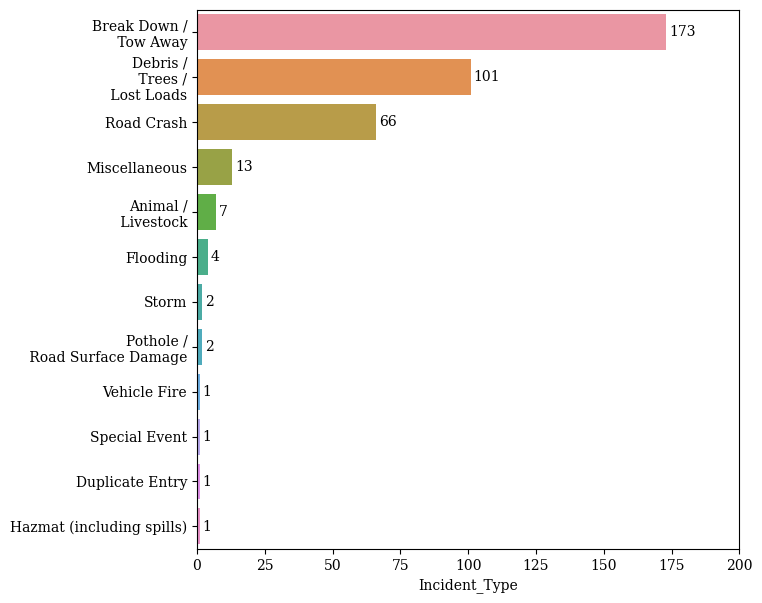

In [115]:
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.barplot(x=df1.Incident_Type.value_counts(),
           y=df1.Incident_Type.value_counts().index)
ax.set_xlim(right=200)
for p in ax.patches:
  width = p.get_width()
  ax.text(width + 1,
          p.get_y() + p.get_height()/2,
          int(width),
          ha="left",
          va="center")
plt.show()

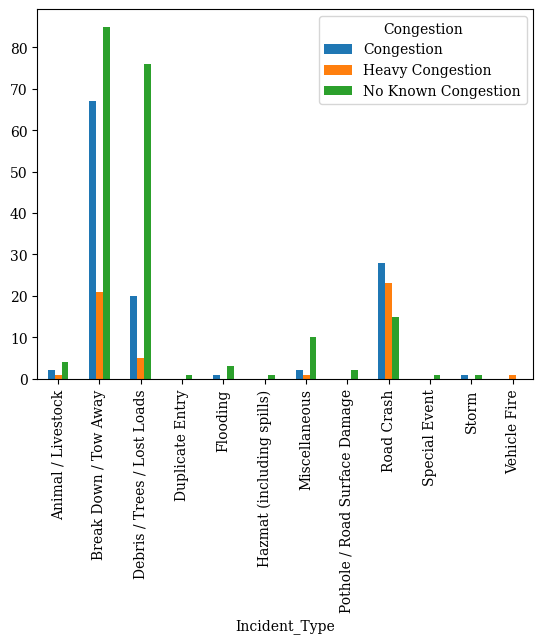

In [110]:
df1.groupby(['Incident_Type', 'Congestion']).size().unstack().plot(kind='bar')
plt.show()